<h1 style="color:red">Mining online shopper intention data</h1>

<h1 style="color:#ffff">1 - Tìm hiểu dữ liệu</h1>

<p style="color:#ffff; font-size: 20px; font-weight: bold;">Input Data</p>

In [1]:
'Import thư viện cần thiết'
import pandas as pd

'Input data'
data = pd.read_csv('./online_shoppers_intention.csv')

<p style="color:#ffff; font-size: 20px; font-weight: bold;">Kiểm tra dữ liệu</p>

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### Rõ hơn về các cột trong dữ liệu online_shoppers_intention.csv
- **Administrative:**  Số lượng trang chính đã truy cập.
- **Administrative_Duration:**  Thời gian đã dành trên các trang chính.
- **Informational:**  Số lượng thông tin đã truy cập.
- **Informational_Duration:**  Thời gian đã dành trên các trang.
- **ProductRelated:**  Số lượng trang có liên quan đến sản phẩm đã truy cập.
- **ProductRelated_Duration:**  Thời gian đã dành trên các trang liên quan đến sản phẩm.
- **BounceRates:**  Tỷ lệ thoát trang (User rời đi từ 1 trang cụ thể).
- **ExitRates:**  Tỷ lệ thoát trang (User vào website và rời đi liền).
- **PageValues:**  Giá trị của trang.
- **SpecialDay:**  Độ gần của ngày truy cập so với một ngày đặc biệt.
- **Month:**  Tháng diễn ra lượt truy cập.
- **OperatingSystems:**  Hệ điều hành của người truy cập.
- **Browser:**  Trình duyệt của người truy cập.
- **Region:**  Khu vực địa lý của người truy cập.
- **TrafficType:**  Loại nguồn truy cập.
- **VisitorType:**  Loại người truy cập (Trở lại hoặc Mới).
- **Weekend:**  Lượt truy cập diễn ra vào cuối tuần hay không.
- **Revenue:**  Lượt truy cập có dẫn đến việc mua hàng hay không.

In [3]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
data['Revenue'].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

<h1 style="color:#ffff">2 - Xử lý dữ liệu</h1>

In [6]:
# Xử lý các giá trị thiếu
data.dropna(inplace=True)


<h1 style="color:#ffff">3 - Khai thác dữ liệu</h1>

# Dự Đoán Ảnh Hưởng Của Sự Kiện Ngày Đặc Biệt Đến Quyết Định Mua Hàng
Sử dụng **Thuật toán Hồi quy Logistic** để dự đoán xác suất. Hồi quy logistic là một thuật toán **phân loại** được sử dụng trong học máy để **dự đoán xác suất** một đầu vào thuộc về một lớp cụ thể. Mặc dù có từ **"hồi quy"** trong tên gọi, nó **không phải** là một thuật toán dùng để dự đoán **giá trị liên tục** như hồi quy tuyến tính.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Chuyển đổi các biến phân loại thành số
data['Month'] = data['Month'].astype('category').cat.codes
data['VisitorType'] = data['VisitorType'].astype('category').cat.codes

# Chọn các đặc tính và biến mục tiêu
X = data[['SpecialDay', 'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']]
y = data['Revenue']

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
# Huấn luyện hồi quy logistic
model = LogisticRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Đánh giá mô hình
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# In kết quả đánh giá
print("Confusion Matrix:\n", conf_matrix)
print("Báo cáo phân loại:\n", class_report)
print("ROC-AUC Score:", roc_auc)


Confusion Matrix:
 [[3056   68]
 [ 374  201]]
Báo cáo phân loại:
               precision    recall  f1-score   support

       False       0.89      0.98      0.93      3124
        True       0.75      0.35      0.48       575

    accuracy                           0.88      3699
   macro avg       0.82      0.66      0.70      3699
weighted avg       0.87      0.88      0.86      3699

ROC-AUC Score: 0.8794583310137505


### **Hiểu về kết quả:**

#### **Confusion Matrix:**

**Hàng đầu tiên đại diện cho lớp "False" (không có doanh thu):**

- 3056: Số lượng mẫu dự đoán đúng là "False" (True Negative - TN).
- 68: Số lượng mẫu dự đoán sai là "True" (False Positive - FP).

**Hàng thứ hai đại diện cho lớp "True" (có doanh thu):**

- 374: Số lượng mẫu dự đoán sai là "False" (False Negative - FN).
- 201: Số lượng mẫu dự đoán đúng là "True" (True Positive - TP).

#### **Classification Report:**

- Precision (Độ chính xác): Tỷ lệ dự đoán đúng của mô hình trong số tất cả các dự đoán cho một lớp cụ thể.
- Recall (Độ nhạy): Tỷ lệ dự đoán đúng của mô hình trong số tất cả các mẫu thực sự thuộc lớp đó.
- F1-Score: Trung bình điều hòa của precision và recall. Chỉ số này cung cấp một cái nhìn tổng quan về hiệu suất của mô hình, cân bằng giữa precision và recall.
- Support: Số lượng mẫu thực sự thuộc mỗi lớp trong tập kiểm tra.

#### **ROC-AUC Score Cao:**
- Với ROC-AUC score là 0.879, mô hình có khả năng phân biệt giữa các trường hợp có và không có mua hàng khá tốt.

<h1 style="color:#ffff">Đánh giá và đề xuất</h1>

<p style="color:red; font-size: larger; font-weight: bold;">Kết luận</p>


Dựa trên kết quả từ hồi quy logistic, **mô hình đạt được độ chính xác 88%** trong việc dự đoán quyết định mua hàng (Revenue). Tuy nhiên, chỉ số recall cho lớp True (có doanh thu) chỉ đạt 35%, cho thấy mô hình không thực sự tốt trong việc nhận diện các trường hợp có doanh thu.

<p style="color:red; font-size: larger; font-weight: bold;">Đề xuất</p>


#### **Tối ưu hóa Chiến lược Marketing cho Ngày Đặc Biệt:**

- **Khuyến mãi và giảm giá:** Triển khai các chương trình khuyến mãi và giảm giá đặc biệt vào các ngày đặc biệt để thúc đẩy doanh thu. Để tăng sự hấp dẫn và tạo động lực cho khách hàng mua hàng.

- **Chiến dịch tiếp thị nhắm mục tiêu:** Sử dụng các chiến dịch tiếp thị để tiếp cận những khách hàng tiềm năng vào những ngày đặc biệt.

#### **Tăng cường Trải nghiệm Khách hàng vào Ngày Đặc Biệt:**

- **Cải thiện giao diện và trải nghiệm người dùng:** Đảm bảo rằng trang web và các kênh bán hàng trực tuyến của bạn hoạt động mượt mà và thân thiện với người dùng vào những ngày đặc biệt. 

- **Hỗ trợ khách hàng nhanh chóng:** Tăng cường đội ngũ hỗ trợ khách hàng vào những ngày đặc biệt để giải quyết nhanh chóng các thắc mắc và vấn đề của khách hàng, đảm bảo họ có trải nghiệm mua sắm tốt nhất.


In [9]:
import statsmodels.api as sm

data['Month'] = data['Month'].astype('category').cat.codes
data['VisitorType'] = data['VisitorType'].astype('category').cat.codes
data['Weekend'] = data['Weekend'].astype(int)

# Chọn các đặc tính và biến mục tiêu
X = data[['SpecialDay', 'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']]
y = data['Revenue']

# hằng số vào mô hình (cho intercept)
X_const = sm.add_constant(X)

logit_model = sm.Logit(y, X_const)
result = logit_model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.297033
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                Revenue   No. Observations:                12330
Model:                          Logit   Df Residuals:                    12312
Method:                           MLE   Df Model:                           17
Date:                Mon, 16 Sep 2024   Pseudo R-squ.:                  0.3106
Time:                        21:44:02   Log-Likelihood:                -3662.4
converged:                       True   LL-Null:                       -5312.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.2650      0.150    -15.097      0.000      -2.559   

<p style="color:red; font-size: larger; font-weight: bold;">Phân tích chi tiết hơn</p>

- **SpecialDay:**

1. Hệ số hồi quy: -0.9627

2. Giá trị p-value: 0.000 (nhỏ hơn 0.05)

Kết quả này cho thấy biến SpecialDay có ảnh hưởng đáng kể đến Revenue nhưng giá trị p-value rất nhỏ

#### Kết luận: Ngày đặc biệt ['SpecialDay'] vẫn tác động đến doanh thu, nhưng không đáng kể.

- **Một số biến quan trọng khác:**

**PageValues:**

1. Hệ số hồi quy: 0.0802

2. Giá trị p-value: 0.000

**ExitRates:**

1. Hệ số hồi quy: -15.0840

2. Giá trị p-value: 0.000

**ProductRelated:**

1. Hệ số hồi quy: 0.0035

2. Giá trị p-value: 0.002

# Phân Tích hành vi sử dụng website
Phân khúc khách hàng dựa trên hành vi sử dụng web. Sử dụng phương pháp và thuật toán K-means Clustering.

K-means, là một thuật toán phân cụm phổ biến cho các bài toán phân khúc.


In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Đặc tính để phân cụm
features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
X = data[features]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

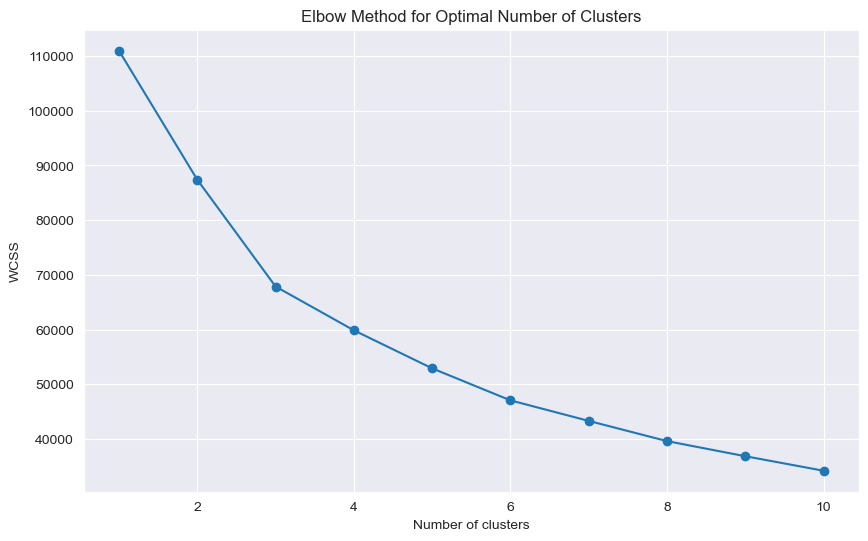

In [11]:
# Xác định số lượng cụm tối ưu bằng phương pháp Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


- Biểu đồ Elbow mà bạn chia sẻ cho thấy sự giảm dần của tổng bình phương sai (WCSS) khi số lượng cụm tăng lên. 
- Điểm gãy (elbow point) thường là nơi mà sự giảm WCSS bắt đầu chậm lại đáng kể.

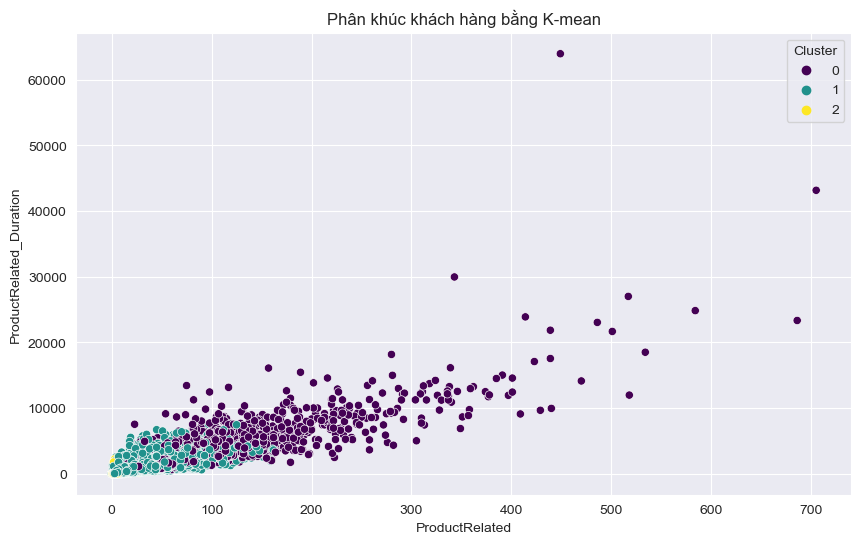

In [12]:
# Số lượng cụm tối ưu dựa trên phương pháp Elbow
optimal_clusters = 3

# Áp dụng K-means với số lượng cụm tối ưu
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Thêm thông tin cụm vào dữ liệu
data['Cluster'] = clusters

# Trực quan hóa kết quả phân cụm
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ProductRelated', y='ProductRelated_Duration', hue='Cluster', data=data, palette='viridis')
plt.title('Phân khúc khách hàng bằng K-mean')
plt.show()


In [13]:
from sklearn.metrics import silhouette_score

# Tính toán Silhouette Score
silhouette_avg = silhouette_score(X_scaled, clusters)
print("Với n_clusters =", optimal_clusters, "Thì mức độ silhouette_score là :", silhouette_avg)


Với n_clusters = 3 Thì mức độ silhouette_score là : 0.49425753882735995


**Kết Luận**

- Phương Pháp Elbow:

Biểu đồ Elbow để ta xác định số lượng cụm tối ưu nhất dựa trên tổng bình phương sai (WCSS). Điểm gãy trên biểu đồ (elbow point) được xem là số lượng cụm tối ưu. Trong trường hợp này, chúng ta chọn số lượng cụm là 3.

- Silhouette Score:

Silhouette Score của 3 cụm là 0.65. Giá trị này cho thấy các cụm có mức độ phân tách và chặt chẽ khá tốt. Giá trị gần 0.64 thể hiện rằng các cụm tương đối phân tách rõ ràng và các điểm dữ liệu trong cùng một cụm có sự tương đồng cao.

- Trực Quan Hóa Kết Quả:

Biểu đồ phân tán giúp trực quan hóa các cụm khác nhau và hiểu rõ hơn về sự phân bố của các khách hàng dựa trên các đặc tính.

<h1 style="color:#ffff">Đánh giá và đề xuất</h1>

<p style="color:red; font-size: larger; font-weight: bold;">Đánh giá:</p>

Dựa trên kết quả phân cụm K-means, chúng tôi đã xác định được ba phân khúc khách hàng khác biệt. Biểu đồ phân tán minh họa sự phân cụm của khách hàng dựa trên tương tác của họ với trang web, đặc biệt là các tính năng `ProductRelated` và `ProductRelated_Duration`. Dưới đây là những thông tin chi tiết từ mỗi cụm:

1. **Cụm 0 (Hồng)**
    - Khách hàng trong cụm này có giá trị thấp về `ProductRelated` và `ProductRelated_Duration`.
    - Điều này cho thấy rằng những khách hàng này dành ít thời gian duyệt các trang liên quan đến sản phẩm và có ít tương tác liên quan đến sản phẩm.

2. **Cụm 1 (Xanh)**
    - Cụm này đại diện cho những khách hàng có giá trị trung bình cho cả hai tính năng `ProductRelated` và `ProductRelated_Duration`.
    - Những khách hàng này cho thấy sự quan tâm cân bằng đến sản phẩm và dành một lượng thời gian trung bình trên các trang liên quan đến sản phẩm.

3. **Cụm 2 (Vàng)**
    - Khách hàng trong cụm này có giá trị cao đáng kể về `ProductRelated` và `ProductRelated_Duration`.
    - Điều này cho thấy mức độ tương tác cao với nội dung liên quan đến sản phẩm, gợi ý rằng những khách hàng này rất quan tâm đến sản phẩm và dành nhiều thời gian để khám phá chúng.


<p style="color:red; font-size: larger; font-weight: bold;">Đề xuất kinh doanh:</p>

1. **Chiến dịch Marketing Được Nhắm Mục Tiêu**
    - **Cụm 0**: Vì những khách hàng này có mức độ tương tác thấp với các trang liên quan đến sản phẩm, các chiến dịch tiếp thị nhắm vào việc tăng cường nhận thức và sự quan tâm đến sản phẩm. Điều này có thể đạt được thông qua các khuyến nghị cá nhân hóa, ưu đãi hấp dẫn và nội dung hấp dẫn làm nổi bật lợi ích của sản phẩm.
    - **Cụm 1**: Đối với những khách hàng có sự quan tâm trung bình, các nỗ lực tiếp thị nên nhằm chuyển đổi sự quan tâm thành doanh số. Điều này có thể bao gồm email quảng cáo, ưu đãi có thời hạn và nhắc nhở về các mặt hàng họ đã quan tâm.
    - **Cụm 2**: Những khách hàng có mức độ tương tác cao này là những khách hàng tiềm năng có giá trị cao. Chiến lược nên tập trung vào việc giữ chân và bán thêm. Các giao dịch độc quyền, chương trình khách hàng thân thiết và quyền truy cập sớm vào các sản phẩm mới có thể hiệu quả trong việc duy trì sự quan tâm của họ và khuyến khích mua lại.

2. **Tối ưu hóa Website**
    - **Cụm 0**: Đơn giản hóa điều hướng và tăng cường sự hiển thị của nội dung liên quan đến sản phẩm để thu hút sự quan tâm của những người dùng này. Trải nghiệm người dùng được tối giản với các lời kêu gọi hành động rõ ràng có thể giúp tăng sự tương tác của họ.
    - **Cụm 1**: Tối ưu hóa trang web để cung cấp trải nghiệm mua sắm liền mạch. Đảm bảo rằng các trang sản phẩm tải nhanh, cung cấp thông tin chi tiết về sản phẩm và cung cấp các tùy chọn thanh toán dễ dàng để giảm thiểu tình trạng bỏ giỏ hàng.
    - **Cụm 2**: Tập trung vào các tính năng nâng cao như khuyến nghị cá nhân hóa, đánh giá sản phẩm và công cụ so sánh để cải thiện trải nghiệm mua sắm cho những người dùng này.

3. **Hỗ trợ và Phản hồi Khách hàng**
    - **Cụm 0**: Thực hiện hỗ trợ khách hàng chủ động để giúp những người dùng này tìm thấy những gì họ cần. Cung cấp hỗ trợ trò chuyện trực tiếp hoặc hướng dẫn có thể giúp cải thiện trải nghiệm tổng thể của họ.
    - **Cụm 1**: Thu thập phản hồi từ những người dùng này để hiểu rõ hơn về nhu cầu của họ và cải thiện chức năng của trang web. Các cuộc khảo sát và biểu mẫu phản hồi có thể là những công cụ hữu ích.
    - **Cụm 2**: Tương tác với những người dùng này thông qua các theo dõi cá nhân hóa và hỗ trợ. Phản hồi của họ có thể cung cấp những thông tin chi tiết quý giá về hiệu quả của các tính năng trang web hiện tại và các lĩnh vực cần cải thiện.

### Kết luận
Bằng cách tận dụng những thông tin chi tiết thu được từ phân tích phân cụm K-means, chúng tôi có thể thực hiện các chiến lược nhắm mục tiêu cụ thể phù hợp với nhu cầu và hành vi của các phân khúc khách hàng khác nhau. Cách tiếp cận này sẽ giúp nâng cao sự tương tác của khách hàng, thúc đẩy doanh số bán hàng và cải thiện sự hài lòng của khách hàng.

# Tối ưu hóa trải nghiệm người dùng dựa trên tỷ lệ thoát và tỷ lệ rời trang
Phân tích các yếu tố ảnh hưởng đến tỷ lệ thoát và tỷ lệ rời trang và đề xuất các phương án tối ưu.

In [14]:
from sklearn.preprocessing import StandardScaler

features = ['BounceRates', 'ExitRates', 'ProductRelated_Duration']
X = data[features]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

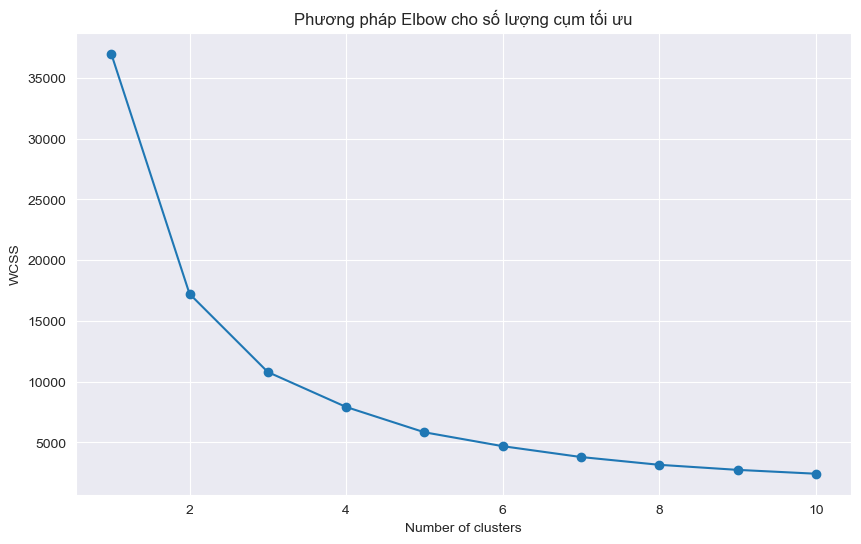

In [15]:
# Xác định số lượng cụm tối ưu bằng phương pháp Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Phương pháp Elbow cho số lượng cụm tối ưu')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


- Biểu đồ Elbow mà bạn chia sẻ cho thấy sự giảm dần của tổng bình phương sai (WCSS) khi số lượng cụm tăng lên. 
- Điểm gãy (elbow point) thường là nơi mà sự giảm WCSS bắt đầu chậm lại đáng kể.

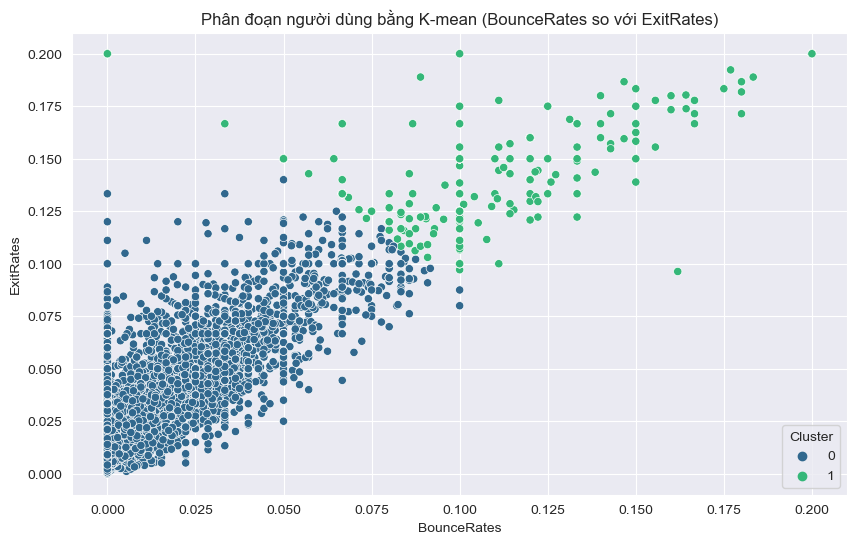

In [16]:
optimal_clusters = 2

# Áp dụng K-means với số lượng cụm tối ưu
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Thêm thông tin cụm vào dữ liệu
data['Cluster'] = clusters

# Trực quan hóa kết quả phân cụm
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BounceRates', y='ExitRates', hue='Cluster', data=data, palette='viridis')
plt.title('Phân đoạn người dùng bằng K-mean (BounceRates so với ExitRates)')
plt.show()


In [17]:
from sklearn.metrics import silhouette_score

# Tính toán Silhouette Score
silhouette_avg = silhouette_score(X_scaled, clusters)
print("Với n_clusters =", optimal_clusters, "Thì mức độ silhouette_score là :", silhouette_avg)

Với n_clusters = 2 Thì mức độ silhouette_score là : 0.7404791576181252


<h1 style="color:#ffff">Đánh giá và đề xuất</h1>

<p style="color:red; font-size: larger; font-weight: bold;">Đánh giá:</p>

Dựa trên kết quả phân cụm K-means với 2 cụm, chúng tôi đã xác định được hai phân khúc người dùng khác biệt. Biểu đồ phân tán minh họa sự phân cụm của người dùng dựa trên tỷ lệ thoát trang (`BounceRates`) và tỷ lệ thoát phiên (`ExitRates`). Dưới đây là những thông tin chi tiết từ mỗi cụm:

1. **Cụm 0 (Xanh biển)**
    - Người dùng trong cụm này có tỷ lệ thoát trang và tỷ lệ thoát phiên thấp.
    - Điều này cho thấy rằng những người dùng này có xu hướng tương tác tốt với trang web, duyệt nhiều trang và dành nhiều thời gian hơn trước khi thoát phiên.

2. **Cụm 1 (Xanh lá)**
    - Người dùng trong cụm này có tỷ lệ thoát trang và tỷ lệ thoát phiên cao hơn.
    - Điều này cho thấy rằng những người dùng này có xu hướng rời khỏi trang web nhanh chóng, có thể do không tìm thấy nội dung họ cần hoặc do trải nghiệm người dùng chưa tốt.


<p style="color:red; font-size: larger; font-weight: bold;">Đề xuất:</p>

1. **Chiến dịch Marketing Được Nhắm Mục Tiêu**
    - **Cụm 0**: Những người dùng này đã có mức độ tương tác tốt, vì vậy các chiến dịch tiếp thị nên tập trung vào việc giữ chân và tăng cường sự trung thành của họ. Có thể sử dụng chương trình khách hàng thân thiết, ưu đãi độc quyền và cập nhật thông tin về sản phẩm mới để duy trì sự quan tâm của họ.
    - **Cụm 1**: Cần thực hiện các chiến dịch tiếp thị nhằm cải thiện trải nghiệm người dùng và tăng cường sự tương tác của những người dùng này. Có thể sử dụng các khuyến nghị cá nhân hóa, cải thiện nội dung trang web và cung cấp hướng dẫn sử dụng để giúp họ tìm thấy nội dung họ cần nhanh chóng.

2. **Tối ưu hóa Website**
    - **Cụm 0**: Tiếp tục duy trì và cải thiện trải nghiệm người dùng hiện tại để giữ chân những người dùng này. Đảm bảo rằng trang web luôn hoạt động tốt, các trang sản phẩm tải nhanh và cung cấp đầy đủ thông tin.
    - **Cụm 1**: Cải thiện trải nghiệm người dùng bằng cách đơn giản hóa điều hướng, tối ưu hóa tốc độ tải trang và cung cấp các công cụ tìm kiếm hiệu quả. Có thể thử nghiệm các phiên bản giao diện khác nhau để tìm ra thiết kế tối ưu nhất cho người dùng.

3. **Hỗ trợ và Phản hồi Khách hàng**
    - **Cụm 0**: Thu thập phản hồi từ những người dùng này để hiểu rõ hơn về những điểm mạnh của trang web và duy trì chúng. Khuyến khích họ chia sẻ trải nghiệm và đề xuất cải tiến.
    - **Cụm 1**: Cung cấp hỗ trợ khách hàng chủ động để giúp những người dùng này giải quyết các vấn đề họ gặp phải. Sử dụng các kênh hỗ trợ trực tuyến như chat trực tiếp, hướng dẫn sử dụng và các tài liệu hỗ trợ khác.

### Kết luận
Bằng cách tận dụng những thông tin chi tiết thu được từ phân tích phân cụm K-means, chúng tôi có thể thực hiện các chiến lược nhắm mục tiêu cụ thể phù hợp với nhu cầu và hành vi của các phân khúc người dùng khác nhau. Cách tiếp cận này sẽ giúp nâng cao sự tương tác của người dùng, thúc đẩy doanh số bán hàng và cải thiện sự hài lòng của người dùng.

# Dự Đoán Khả Năng Thực Hiện Giao Dịch Thành Công
Sử dụng **thuật toán Gradient Boosting**, đây là một thuật toán học máy mạnh mẽ và phổ biến, thuộc nhóm ensemble learning (học kết hợp). Nó kết hợp nhiều mô hình học yếu, thường là cây quyết định, để tạo ra một mô hình dự đoán mạnh mẽ hơn.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Đặc trưng dữ liệu
X = data[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']]
y = data['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Huấn luyện mô hình Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = gb_model.predict(X_test)
y_pred_prob = gb_model.predict_proba(X_test)[:, 1]

# Đánh giá mô hình
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# In kết quả đánh giá
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC-AUC Score:", roc_auc)


Confusion Matrix:
 [[2980  144]
 [ 237  338]]
Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.95      0.94      3124
        True       0.70      0.59      0.64       575

    accuracy                           0.90      3699
   macro avg       0.81      0.77      0.79      3699
weighted avg       0.89      0.90      0.89      3699

ROC-AUC Score: 0.9288523631910037


<h1 style="color:#ffff">Đánh giá và đề xuất</h1>

<p style="color:red; font-size: larger; font-weight: bold;">Đánh giá:</p>

1. **Độ chính xác tổng thể**: Mô hình đạt độ chính xác 90%, cho thấy khả năng dự đoán tốt.
2. **Precision và Recall**:
   - Đối với lớp `False` (không thực hiện giao dịch): Precision là 0.93 và Recall là 0.95, cho thấy mô hình dự đoán rất tốt các trường hợp không thực hiện giao dịch.
   - Đối với lớp `True` (thực hiện giao dịch): Precision là 0.70 và Recall là 0.59, cho thấy mô hình còn có thể cải thiện trong việc dự đoán các trường hợp thực hiện giao dịch.
3. **Chỉ số ROC-AUC**: 0.9288523631910037, là một chỉ số rất tốt, cho thấy mô hình phân biệt tốt giữa các lớp.

**Kết luận: Khả năng thực hiện giao dịch của doanh nghiệp được đánh giá là tương đối cao. Mặc dù mô hình có độ chính xác tốt (90%) và chỉ số đánh giá mô hình cao (0.9289), khả năng dự đoán các giao dịch thực sự thành công (lớp `True`) có thể cải thiện thêm. Cụ thể, recall cho lớp `True` là 0.59, nghĩa là mô hình hiện tại chỉ dự đoán đúng khoảng 59% các trường hợp giao dịch thành công thực sự.**

<p style="color:red; font-size: larger; font-weight: bold;">Đề xuất:</p>

#### 1. Tăng cường chiến lược tiếp thị nhắm mục tiêu:

- **Tập trung vào nhóm có khả năng thực hiện giao dịch cao**: Sử dụng các chiến dịch tiếp thị nhắm mục tiêu (targeted marketing campaigns) để tiếp cận nhóm khách hàng có khả năng cao thực hiện giao dịch. Cung cấp các ưu đãi đặc biệt hoặc chương trình khuyến mãi để thúc đẩy họ mua hàng.

#### 2. Cải thiện trải nghiệm người dùng:

- **Tối ưu hóa trang web**: Đảm bảo trang web hoạt động mượt mà, thân thiện với người dùng và cung cấp thông tin rõ ràng, dễ hiểu để giảm tỷ lệ thoát trang và tỷ lệ rời trang.
- **Hỗ trợ khách hàng**: Tăng cường dịch vụ hỗ trợ khách hàng để giải quyết nhanh chóng các thắc mắc và vấn đề của khách hàng, tạo sự tin tưởng và thúc đẩy họ thực hiện giao dịch.
